# M1 Assignment  - Part 1: Text Processing and Edit Distance 

In this section we will be exploring how to preprocess tweets . We will provide a function for preprocessing tweets during this week's assignment, but it is still good to know what is going on under the hood. By the end of this lecture, you will see how to use the [NLTK](http://www.nltk.org) package to perform a preprocessing pipeline for Twitter datasets.

## Setup
Eventually, you will conduct a sentiment analysis on Tweets. To help with that, we will be using the Natural Language Toolkit (NLTK) package, an open-source Python library for natural language processing. In this library you will use the NLTK to assist with processing the tweet to clean it for interpretation. 

In Part 1.1, you will call the Twitter API to return a series of tweets given an input, 'Elon Musk'. Next in Part 1.2, you will process the tweets using the various processing tasks outlined in the section and Chapter 2 of Jurafsky and Martin. Finally, in Part 1.3, you will create a simple version of a Levensthein distance formula to run the edit distance between two matrices. 

As part of completing the assignment, you will see that there are areas in the note book for you to complete your own coding input. 

It will be look like following: 
```
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
'Some coding activity for you to complete'
### END CODE HERE ###

```

## Part 1.1: Using the Twitter API to return Tweets

### Calling the Twitter API
In this section, we will use the requests library to retrieve Tweets. Note that you will need to store these _twitter_keys.py_. in your specified library path to complete the portion of the assignment. The following code allows you to authenticate to teh Twitter API. You can run this code using the provided keys, to see that your expected output -- response code 200 -- results in a connection to the API. 

In [46]:
import requests
import json
import base64
import twitter_keys 
#this is a custom reference module to a package containing twitter keys
#you will need to import this into your lib path to implement the following code

%config IPCompleter.greedy=True
key_secret = '{}:{}'.format(twitter_keys.client_key, twitter_keys.client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

#identify base url and oauth token path
base_url = 'https://api.twitter.com/' #base url for authentication
auth_url = '{}oauth2/token'.format(base_url)

#share header information -- encoding is ascii
auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

#pass clientcredentials
auth_data = {
    'grant_type': 'client_credentials'
}

#send authentication using requests - POST request
auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)

#check response status. 200 = OK
print("Response Code: ", auth_resp.status_code)

Response Code:  200


Expected output should be: 

```
Response Code:  200
```

### Extracting tweets
In this next section, you will submit a request to Twitter to retreive tweets. In this case, we are extracting the 10 most popular tweets with the text 'Elon Musk'.

The full Twitter API Documentation can be found [here](https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets).


In [68]:
#Keys in data response are token_type (bearer) and access_token (your access token)
access_token = auth_resp.json()['access_token']

search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

#enter search parameters in JSON string:
query = 'Elon Musk'
result_type = 'popular'
count = 10
lang = 'en'

query_params = {
    'q': query, #inputs the query parameter to filter tweets. 
    'result_type': result_type, #filters by most popular tweets
    'count': count, #provides the top 15 results, defaults to 15
    'lang': 'en' #filters by english language only
}

#identify search url path and save 
search_url = '{}1.1/search/tweets.json'.format(base_url)
#run search using get request
search_resp = requests.get(search_url, headers=search_headers, params=query_params)

#send request and print results 
print( count, "tweets returned: ")
twitter_data = search_resp.json()
for x in twitter_data['statuses']:
    print(x['text'] + '\n')

10 tweets returned: 
Elon Musks's wealth in 2020: $24,600,000,000
 
Elon Musk's wealth in 2021: $175,400,000,000

That’s a 613% increase… https://t.co/fy9IEVdfzE

Elon Musk Token is here !!! 

The Troller The Father of All Meme Coins 

5  Big Blockchain Events Booked
Top Influe… https://t.co/x3vFw6XkXJ

This is how Elon Musk's mother raised successful children https://t.co/d7tfWPsCQs

No, it’s not a mirage in the desert haze. Nor is it Elon Musk’s latest plan to colonise Mars 🚀

These are the desig… https://t.co/RBhMzOdoGN

SpaceX research – with Elon Musk as an author, alongside NASA and several medical colleges – details how the existi… https://t.co/Z8P9g0qHa5

If Elon Musk gets his way, the people of Texas may soon count Tesla as one of its many electric utility options," s… https://t.co/KiD6rAFxeE

Elon Musk says $TSLA hopes to start offering real-time car insurance in Texas next month

Jeff Bezos made his fortune by providing fast, reliable, and affordable delivery of goods to our

## Part 1.2: Preprocessing the text from tweets
Text processing is one of the critical steps in an NLP project and in data scenience and analytics. It includes cleaning and formatting the data before feeding an algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

1. Tokenizing the string
2. Lowercasing
3. Removing stop words and punctuation
4. Stemming

We will take this approach with a selected tweet that we returned from above see how this is transformed by each preprocessing step.

Let's take one of the tweets and apply preprocessing steps

In [48]:
#We're taking the 5th tweet parsed from above. It is complex enough that we can apply our preprocessing steps. 
tweet = twitter_data['statuses'][5]['text']
print(tweet)

This is how Elon Musk's mother raised successful children https://t.co/d7tfWPsCQs


In [19]:
import nltk                                # Python library for NLP
import re                                  # library for regular expression operations
import string                              # for string operations
import nltk

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [20]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Remove hyperlinks
First, we will use regex to remove hyperlinks. You will create the regex substring to remove hyperlinks. 

In [72]:
#reproduce the tweet we selected below: 
print(tweet)

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet) #run this to clean up old tweets

### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

regex_remove_hyperlinks = None

### END CODE HERE ###


# remove hyperlinks
tweet2 = re.sub(regex_remove_hyperlinks, '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

This is how Elon Musk's mother raised successful children https://t.co/d7tfWPsCQs
This is how Elon Musk's mother raised successful children 


### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [50]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


This is how Elon Musk's mother raised successful children 


Tokenized string:
['this', 'is', 'how', 'elon', "musk's", 'mother', 'raised', 'successful', 'children']


### Remove stop words and punctuations

The next step is to remove stop words and miscelleneous punctuations. Stop words are words that do not have semantic meaning to the tweet. There is a library of stopwords built into NLTK. The list provided by NLTK when you run the cells below.

In [51]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. 
These could be words like _i, not, between, because, won, against_. In some cases, you may want to update this dictionary of stop words to suit your needs. 

Certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions, but in some cases they should be removed.


In [75]:
print(tweet_tokens)
print()

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

['this', 'is', 'how', 'elon', "musk's", 'mother', 'raised', 'successful', 'children']

removed stop words and punctuation:
['elon', "musk's", 'mother', 'raised', 'successful', 'children']


## preprocess_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words.  In the week's assignment, you will use the function `preprocess_tweet(tweet)` available in _utils.py_. We encourage you to open the file and you'll see that this function's implementation is very similar to the steps above.

To obtain the same result as in the previous code cells, you will only need to call the function `process_tweet()`. Let's do that in the next cell.

In [77]:
def preprocess_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
            
    return tweets_clean

In [78]:
#from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = twitter_data['statuses'][5]['text']

print()
print(tweet)


# call the imported function
tweets_stem = preprocess_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result


If Elon Musk gets his way, the people of Texas may soon count Tesla as one of its many electric utility options," s… https://t.co/KiD6rAFxeE
preprocessed tweet:
['elon', 'musk', 'get', 'way', 'peopl', 'texa', 'may', 'soon', 'count', 'tesla', 'one', 'mani', 'electr', 'util', 'option', '…']


## Part 1.3 Create a Levensthein Distance Formula

Recall that Edit Distance is the similarity between two words represented numericallly. Levenstehin distance is one of the most common algorithms used in calculating the edit distance between two words. 

Create your own simple Levensthein distance function. Then return the results of the distance between two words: _stemming_ and _lemmatization_.

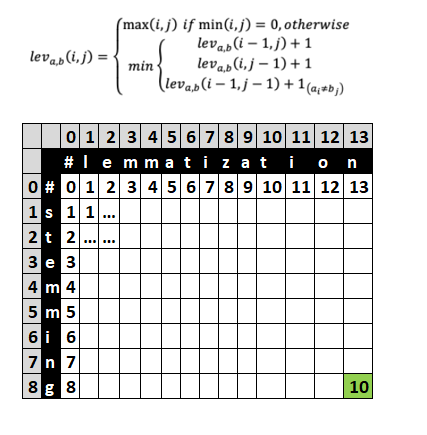

In [92]:
def leven_dist(string1, string2):
    '''
    input: 
        string1 = the first word in your formula
        string2 = the second word in your formula
    output: 
        levenschtein edit distance
    
    '''
    #if min(i,j) =/= 0 
    if not string1: return len(string2)
    if not string2: return len(string1)
    
### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    #because min(i,j) =/= 0 then we min(i,j)
    
    return min(
        
        #part I. calculate the numerical position of letter i-1, j and add 1
        leven_dist(None, None)+1, 
        

        #part II: calculate the numerical position of letter i, j-1 and add 1
        leven_dist(None, None)+1,
        
        # part III: if position i-1, j-1 are not the same letter, then add 1
        leven_dist(None)+None
    )
### END CODE HERE ###



#now run your results

string1 = 'stemming'
string2 = 'lemmatization'
print("Your Levensthein Distance is: ",leven_dist(string1,string2))

TypeError: object of type 'NoneType' has no len()

### Expected output:
Your Levensthein Distance is: 10

                                            #end of assignment#
                                            
Source: 
Natural Language preprocessing, deeplearning.ai
Twitter API documentation
Wikipedia: Levensthein Distance
Chapter 2 (Jurafsky and Martin)
                        
